In [82]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data Collection

In [84]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Delivery_Time/main/delivery_time.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Data Preparation

In [85]:
data.shape

(21, 2)

This means that this dataset has 21 rows and 2 columns.

In [86]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Standard devation is not very high which means that there is no much variation in the data.

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


There are no null/missing values in the data.

<Axes: xlabel='Delivery Time', ylabel='Density'>

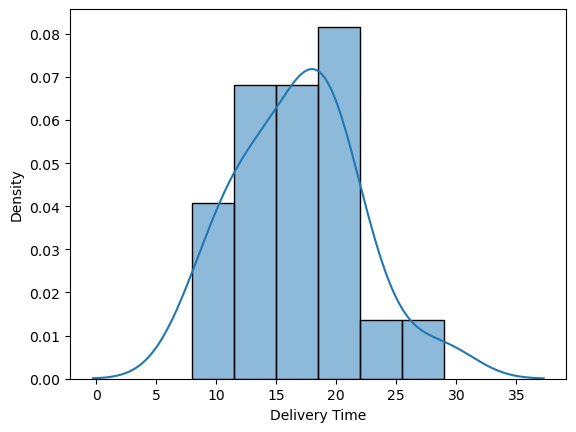

In [88]:
sns.histplot(x = data['Delivery Time'],stat = 'density',kde = True,kde_kws=dict(cut=3))

<Axes: xlabel='Sorting Time', ylabel='Density'>

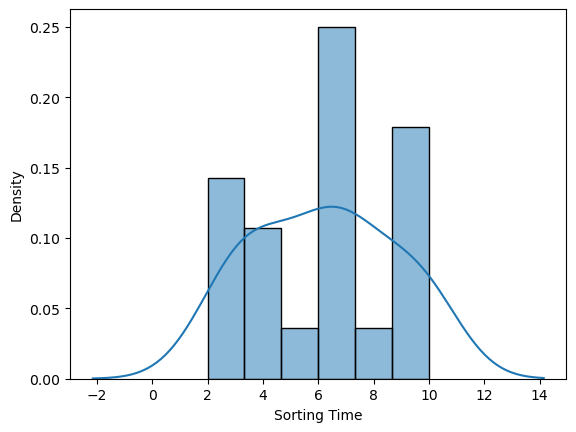

In [90]:
sns.histplot(x = data['Sorting Time'],stat = 'density',kde = True,kde_kws=dict(cut=3))

Data is normally distributed.

<Axes: xlabel='Delivery Time'>

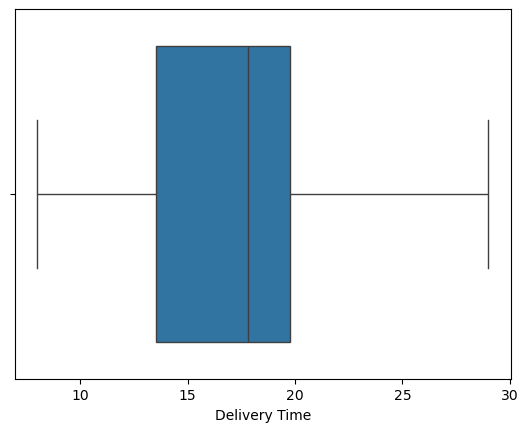

In [91]:
sns.boxplot(x = 'Delivery Time', data = data)

<Axes: xlabel='Sorting Time'>

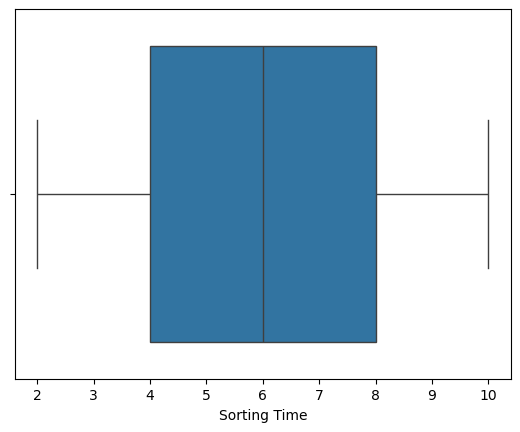

In [92]:
sns.boxplot(x = 'Sorting Time', data = data)

There are no outliers in the data.

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


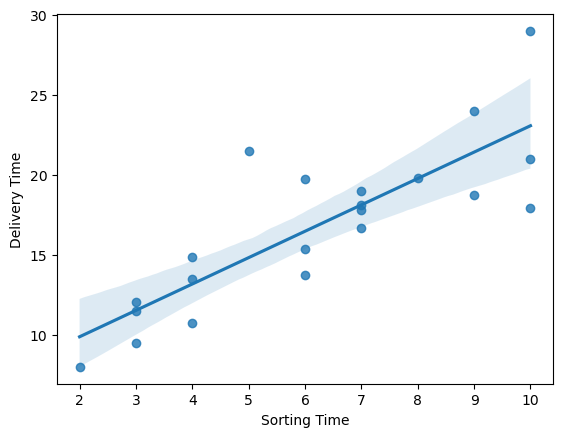

In [93]:
sns.regplot(x = 'Sorting Time',y = 'Delivery Time',data = data)
data.corr()

We can see that there is high positive correlation between both the variables.

In [135]:
X = data['Sorting Time'].values.reshape(-1,1)
y = data['Delivery Time'].values.reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 1234)

### Model Selection - Simple Linear Regression

### Model building and Training

In [139]:
lr = LinearRegression()
lr_fit = lr.fit(X_train,y_train)
lr_fit

LinearRegression()


### Model Evaluation

In [140]:
y_pred_train = lr_fit.predict(X_train)

print('Training Accuracy is',round(r2_score(y_train,y_pred_train),2))

Training Accuracy is 0.63


In [141]:
y_pred_test = lr_fit.predict(X_test)

print('Testing Accuracy is',round(r2_score(y_test,y_pred_test),2))

Testing Accuracy is 0.63


Training Accuracy is close to Testing Accuracy which means it is a Generalized Model. 